In [1]:
import pandas as pd

# Load the train.csv file
train_df = pd.read_csv('training_chunks.csv')

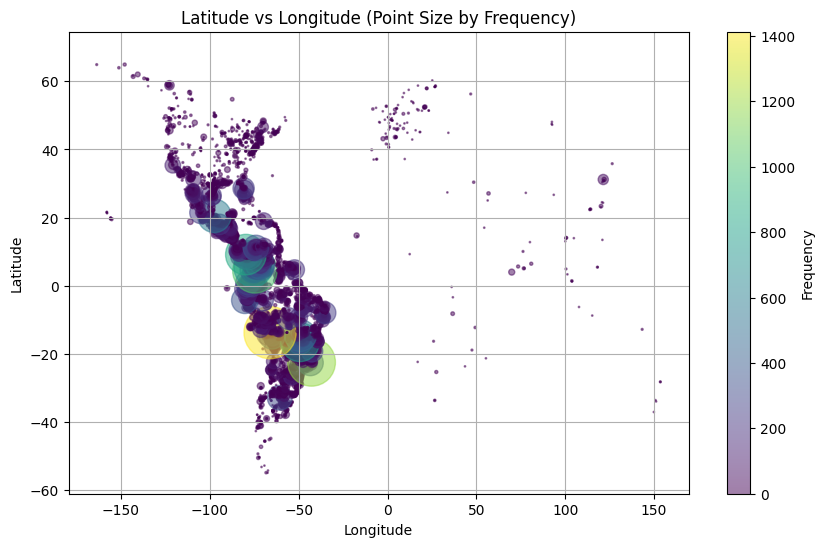

In [2]:
import matplotlib.pyplot as plt

# Calculate the frequency of each latitude/longitude pair
freq = train_df.groupby(['latitude', 'longitude']).size().reset_index(name='count')

# Extract latitude, longitude, and frequency
latitudes = freq['latitude']
longitudes = freq['longitude']
sizes = freq['count']//2  # Use the frequency as the size of the points

# Plot the points on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, s=sizes, alpha=0.5, c=sizes, cmap='viridis')
plt.title('Latitude vs Longitude (Point Size by Frequency)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Frequency')
plt.grid(True)
plt.show()

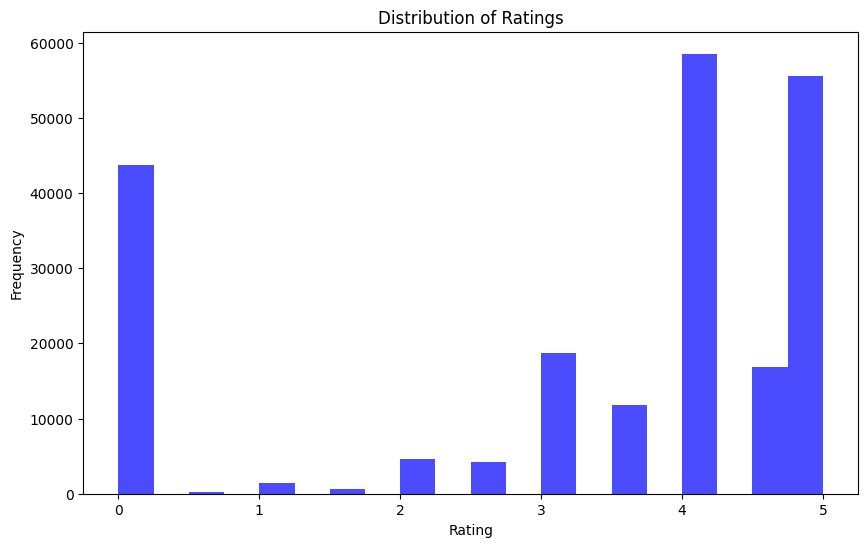

In [3]:
# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
train_df['rating'].hist(bins=20, alpha=0.7, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [15]:
from utils import contains_human_voice, load_all_training_chunks, segment_length

training_chunks = load_all_training_chunks()
training_chunks['contains_human_voice'] = training_chunks.apply(
    lambda row: contains_human_voice(row['filename'], row['audio_start'], row['audio_start'] + segment_length),
    axis=1
)
training_chunks = training_chunks[~training_chunks['contains_human_voice']]
training_chunks

,primary_label,secondary_labels,type,filename,collection,rating,url,latitude,longitude,scientific_name,common_name,author,license,file_length,audio_start,contains_human_voice
0,1139490,[''],[''],1139490/CSA36385.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0,98.853375,0,False
20,1139490,[''],[''],1139490/CSA36389.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0,96.537719,0,False
40,1192948,[''],[''],1192948/CSA36358.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0,116.599812,0,False
64,1192948,[''],[''],1192948/CSA36366.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.2800,-73.8582,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0,105.446313,0,False
86,1192948,[''],[''],1192948/CSA36373.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0,103.631469,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216260,ywcpar,[''],[''],ywcpar/iNat819873.ogg,iNat,0.0,https://static.inaturalist.org/sounds/819873.mp3,10.5838,-66.8545,Amazona ochrocephala,Yellow-crowned Parrot,Alejandro Luy,cc-by-nc 4.0,27.036750,25,False
216261,ywcpar,[''],[''],ywcpar/iNat922688.ogg,iNat,0.0,https://static.inaturalist.org/sounds/922688.wav,9.1156,-79.4907,Amazona ochrocephala,Yellow-crowned Parrot,Kalvin Chan,cc-0 4.0,16.015031,0,False
216262,ywcpar,[''],[''],ywcpar/iNat922688.ogg,iNat,0.0,https://static.inaturalist.org/sounds/922688.wav,9.1156,-79.4907,Amazona ochrocephala,Yellow-crowned Parrot,Kalvin Chan,cc-0 4.0,16.015031,5,False
216263,ywcpar,[''],[''],ywcpar/iNat922688.ogg,iNat,0.0,https://static.inaturalist.org/sounds/922688.wav,9.1156,-79.4907,Amazona ochrocephala,Yellow-crowned Parrot,Kalvin Chan,cc-0 4.0,16.015031,10,False


In [19]:
results_df = pd.read_csv('results_df.csv', index_col=0)
training_chunks = training_chunks.reset_index(drop=True)
training_chunks = pd.merge(training_chunks, results_df, left_index=True, right_index=True, how='outer')

In [ ]:
training_chunks.drop(columns=['contains_human_voice'], inplace=True)

,primary_label,secondary_labels,type,filename,collection,rating,url,latitude,longitude,scientific_name,common_name,author,license,file_length,audio_start,contains_human_voice,True_Label,Predicted_Label
0,1139490,[''],[''],1139490/CSA36385.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0,98.853375,0,False,0,4
1,1139490,[''],[''],1139490/CSA36389.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0,96.537719,0,False,0,29
2,1192948,[''],[''],1192948/CSA36358.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0,116.599812,0,False,1,66
3,1192948,[''],[''],1192948/CSA36366.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.2800,-73.8582,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0,105.446313,0,False,1,66
4,1192948,[''],[''],1192948/CSA36373.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0,103.631469,0,False,1,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207986,ywcpar,[''],[''],ywcpar/iNat819873.ogg,iNat,0.0,https://static.inaturalist.org/sounds/819873.mp3,10.5838,-66.8545,Amazona ochrocephala,Yellow-crowned Parrot,Alejandro Luy,cc-by-nc 4.0,27.036750,25,False,205,113
207987,ywcpar,[''],[''],ywcpar/iNat922688.ogg,iNat,0.0,https://static.inaturalist.org/sounds/922688.wav,9.1156,-79.4907,Amazona ochrocephala,Yellow-crowned Parrot,Kalvin Chan,cc-0 4.0,16.015031,0,False,205,205
207988,ywcpar,[''],[''],ywcpar/iNat922688.ogg,iNat,0.0,https://static.inaturalist.org/sounds/922688.wav,9.1156,-79.4907,Amazona ochrocephala,Yellow-crowned Parrot,Kalvin Chan,cc-0 4.0,16.015031,5,False,205,205
207989,ywcpar,[''],[''],ywcpar/iNat922688.ogg,iNat,0.0,https://static.inaturalist.org/sounds/922688.wav,9.1156,-79.4907,Amazona ochrocephala,Yellow-crowned Parrot,Kalvin Chan,cc-0 4.0,16.015031,10,False,205,205


In [22]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Group by rating and compute accuracy and balanced accuracy for each group
grouped_metrics = training_chunks.groupby('rating').apply(
    lambda group: pd.Series({
        'Accuracy': accuracy_score(group['True_Label'], group['Predicted_Label']),
        'Balanced Accuracy': balanced_accuracy_score(group['True_Label'], group['Predicted_Label'])
    })
)

print(grouped_metrics)


        Accuracy  Balanced Accuracy
rating                             
0.0     0.663917           0.489930
0.5     0.466667           0.368248
1.0     0.451054           0.358123
1.5     0.539763           0.447653
2.0     0.542016           0.435377
2.5     0.617167           0.490046
3.0     0.623723           0.518882
3.5     0.678146           0.560036
4.0     0.694723           0.585166
4.5     0.735321           0.656135
5.0     0.741089           0.625638


c:\Users\aschieb\AppData\Local\pypoetry\Cache\virtualenvs\birdclef-2025-YT0uVT6V-py3.11\Lib\site-packages\sklearn\metrics\_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\aschieb\AppData\Local\pypoetry\Cache\virtualenvs\birdclef-2025-YT0uVT6V-py3.11\Lib\site-packages\sklearn\metrics\_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\aschieb\AppData\Local\pypoetry\Cache\virtualenvs\birdclef-2025-YT0uVT6V-py3.11\Lib\site-packages\sklearn\metrics\_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\aschieb\AppData\Local\pypoetry\Cache\virtualenvs\birdclef-2025-YT0uVT6V-py3.11\Lib\site-packages\sklearn\metrics\_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains clas

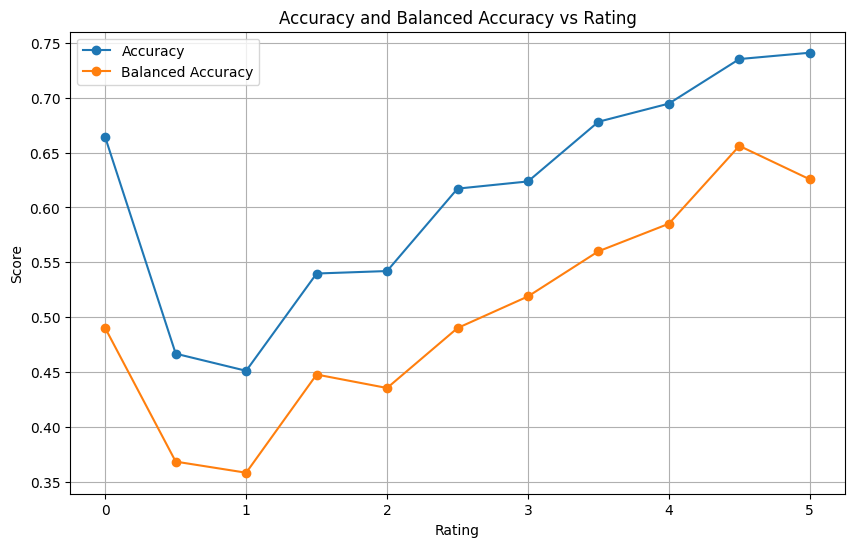

In [23]:
plt.figure(figsize=(10, 6))

# Plot Accuracy vs Rating
plt.plot(grouped_metrics.index, grouped_metrics['Accuracy'], label='Accuracy', marker='o')

# Plot Balanced Accuracy vs Rating
plt.plot(grouped_metrics.index, grouped_metrics['Balanced Accuracy'], label='Balanced Accuracy', marker='o')

plt.title('Accuracy and Balanced Accuracy vs Rating')
plt.xlabel('Rating')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
from functools import lru_cache
from geopy.geocoders import Nominatim

# Initialize the geolocator
geolocator = Nominatim(user_agent="geoapi")

# Function to get the country from latitude and longitude
@lru_cache()
def get_country(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), language='en')
        if location and 'country' in location.raw['address']:
            return location.raw['address']['country']
        else:
            return None
    except Exception as e:
        return None

# Example usage
freq_country = freq[:5].apply(lambda row: get_country(row['latitude'], row['longitude']), axis=1)
# print(freq[['latitude', 'longitude', 'country']])
freq_country

0    Argentina
1    Argentina
2    Argentina
3        Chile
4        Chile
dtype: object

In [38]:
import ast
# Filter rows where secondary_labels is not empty
rows_with_secondary_labels = training_chunks[training_chunks['secondary_labels'] != "['']"]
L=ast.literal_eval(rows_with_secondary_labels.loc[rows_with_secondary_labels.index[0],'secondary_labels'])
L

['65448', '22976', '476538']

In [45]:
training_chunks = load_all_training_chunks()
myds = AudioDataset(training_chunks)
print(myds[0])

(tensor([[[-74.7040, -74.7040, -74.7040,  ..., -34.4293, -27.5295, -28.8625],
         [-74.7040, -74.7040, -74.7040,  ..., -32.4355, -26.2289, -26.9479],
         [-74.7040, -74.7040, -74.7040,  ..., -29.2454, -24.1480, -23.8845],
         ...,
         [-60.9865, -59.8988, -59.4699,  ..., -32.6420, -31.3766, -29.5933],
         [-64.8114, -68.2015, -68.8447,  ..., -58.5263, -56.0780, -45.1314],
         [-67.2020, -73.3906, -74.7040,  ..., -74.7040, -71.5164, -54.8427]],

        [[-74.7040, -74.7040, -74.7040,  ..., -34.4293, -27.5295, -28.8625],
         [-74.7040, -74.7040, -74.7040,  ..., -32.4355, -26.2289, -26.9479],
         [-74.7040, -74.7040, -74.7040,  ..., -29.2454, -24.1480, -23.8845],
         ...,
         [-60.9865, -59.8988, -59.4699,  ..., -32.6420, -31.3766, -29.5933],
         [-64.8114, -68.2015, -68.8447,  ..., -58.5263, -56.0780, -45.1314],
         [-67.2020, -73.3906, -74.7040,  ..., -74.7040, -71.5164, -54.8427]],

        [[-74.7040, -74.7040, -74.7040,  ..